In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

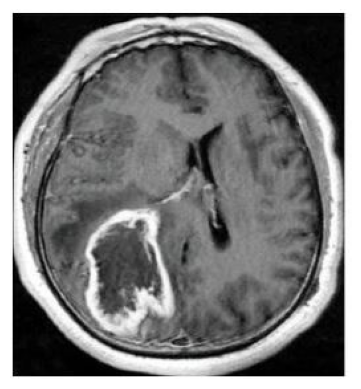

In [2]:
orig_img = cv2.imread("brain2.JPG",1) 
plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

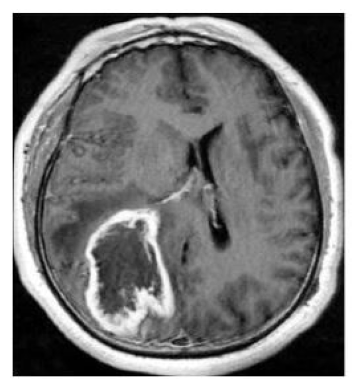

In [3]:
gray_img = cv2.cvtColor( orig_img, cv2.COLOR_BGR2GRAY )
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()

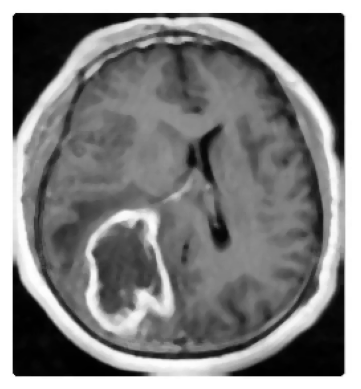

In [4]:
median_filtered = cv2.medianBlur(gray_img, 5)
plt.imshow(median_filtered, cmap='gray')
plt.axis('off')
plt.show()

Gx 
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
Gy 
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


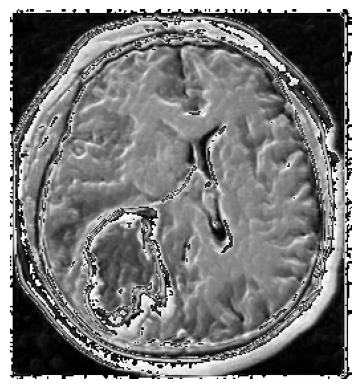

In [5]:
Gx= np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
print ("Gx \n", Gx)
Gy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
print ("Gy \n", Gy)
img_sobelx = cv2.Sobel(median_filtered, cv2.CV_8U,1,0,ksize=3)
img_sobely = cv2.Sobel(median_filtered, cv2.CV_8U,0,1,ksize=3)
img_sobel = img_sobelx + img_sobely + gray_img
plt.imshow(img_sobel, cmap='gray')
plt.axis('off')
plt.show()

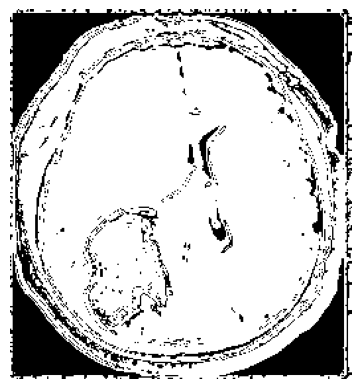

In [6]:
threshold = 50
maxValue = 255
th, thresh = cv2.threshold(img_sobel, threshold, maxValue, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

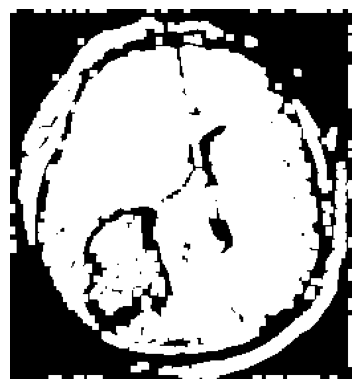

In [7]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
plt.imshow(opening, cmap = 'gray')
plt.axis('off')
plt.show()

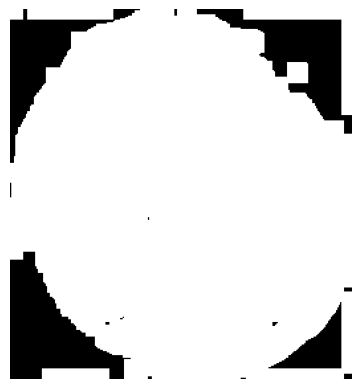

In [8]:
sure_bg = cv2.dilate(opening, kernel, iterations = 5)
plt.imshow(sure_bg, cmap='gray')
plt.axis('off')
plt.show()

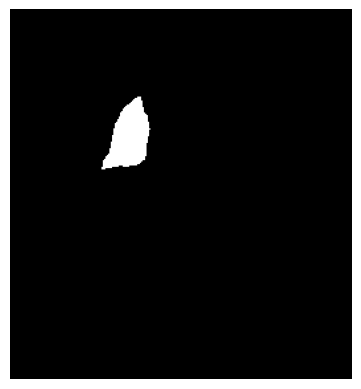

In [9]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
plt.imshow(sure_fg, cmap = 'gray')
plt.axis('off')
plt.show()

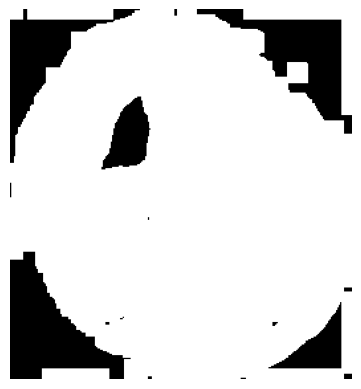

In [10]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
plt.imshow(unknown, cmap = 'gray')
plt.axis('off')
plt.show()

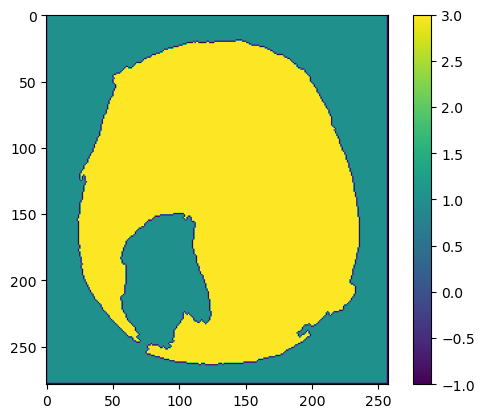

In [11]:
contours, hierarchy = cv2.findContours(sure_fg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
marker = np.zeros((gray_img.shape[0], gray_img.shape[1]), dtype = np.int32)
marker = np.int32(sure_fg) + np.int32(sure_bg)

for id in range(len(contours)):
    cv2.drawContours(marker, contours, id, id+2, -1)

marker = marker + 1
marker[unknown == 255] = 0
copy_img = orig_img.copy()
cv2.watershed(copy_img, marker)

imgplt = plt.imshow(marker)
plt.colorbar()
plt.show()

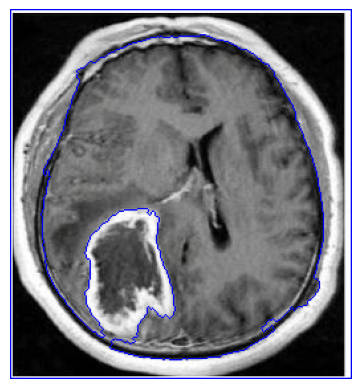

In [12]:
copy_img[marker == -1] = (0,0,255)
cv2.imwrite('img.jpg', copy_img)
plt.imshow(copy_img, cmap = 'gray')
plt.axis('off')
plt.show()

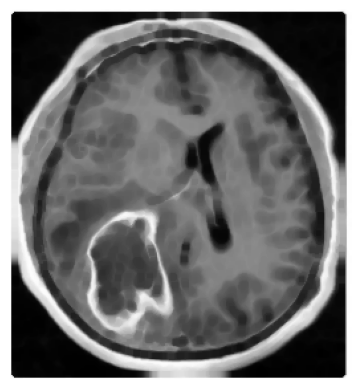

In [13]:
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
erosion = cv2.morphologyEx(median_filtered, cv2.MORPH_ERODE, kernel)
plt.imshow(erosion,cmap='gray')
plt.axis('off')
plt.show()

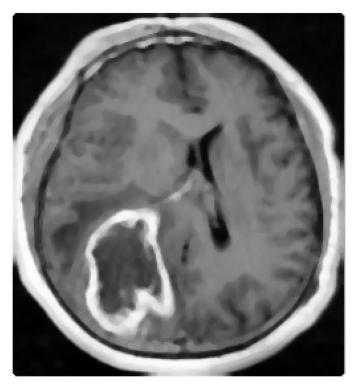

In [14]:
dilation = cv2.morphologyEx(erosion, cv2.MORPH_DILATE, kernel)
plt.imshow(dilation,cmap='gray')
plt.axis('off')
plt.show()